**Senior Design Project - Design and Implementation of a Smart Parking Lot System using Computer Vision**

Virtual GPU Check

In [ ]:
# --> GPU Check
!nvidia-smi

Mon Jan 13 20:24:59 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Importing and Installing Dependencies

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 23.6 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [ ]:
#--> importing libraries and dependencies
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


Loading Parking Lot Dataset from Roboflow

Steps for Data Preparation
*   Capturing parking lot images during peak and non-peak hours
*   Anotating the Dataset



In [ ]:
# --> Downloading custom dataset
from roboflow import Roboflow
rf = Roboflow(api_key="ZrZQGni55dk5sOQcNBZN")
project = rf.workspace("senior-design-project-fl1kg").project("parking-space-finder-wjxkw-fqkpj-ba5tc")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to parking-space-finder-3 in yolov11:: 100%|██████████| 1954/1954 [00:01<00:00, 1767.64it/s]


In [ ]:
dataset.location

'/content/parking-space-finder-3'

Model Training
levaraging the pre-trained YOLOv11 Model from Ultralytics

In [ ]:
# --> Transfer Learning block
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=40 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 110MB/s]
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/parking-space-finder-3/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

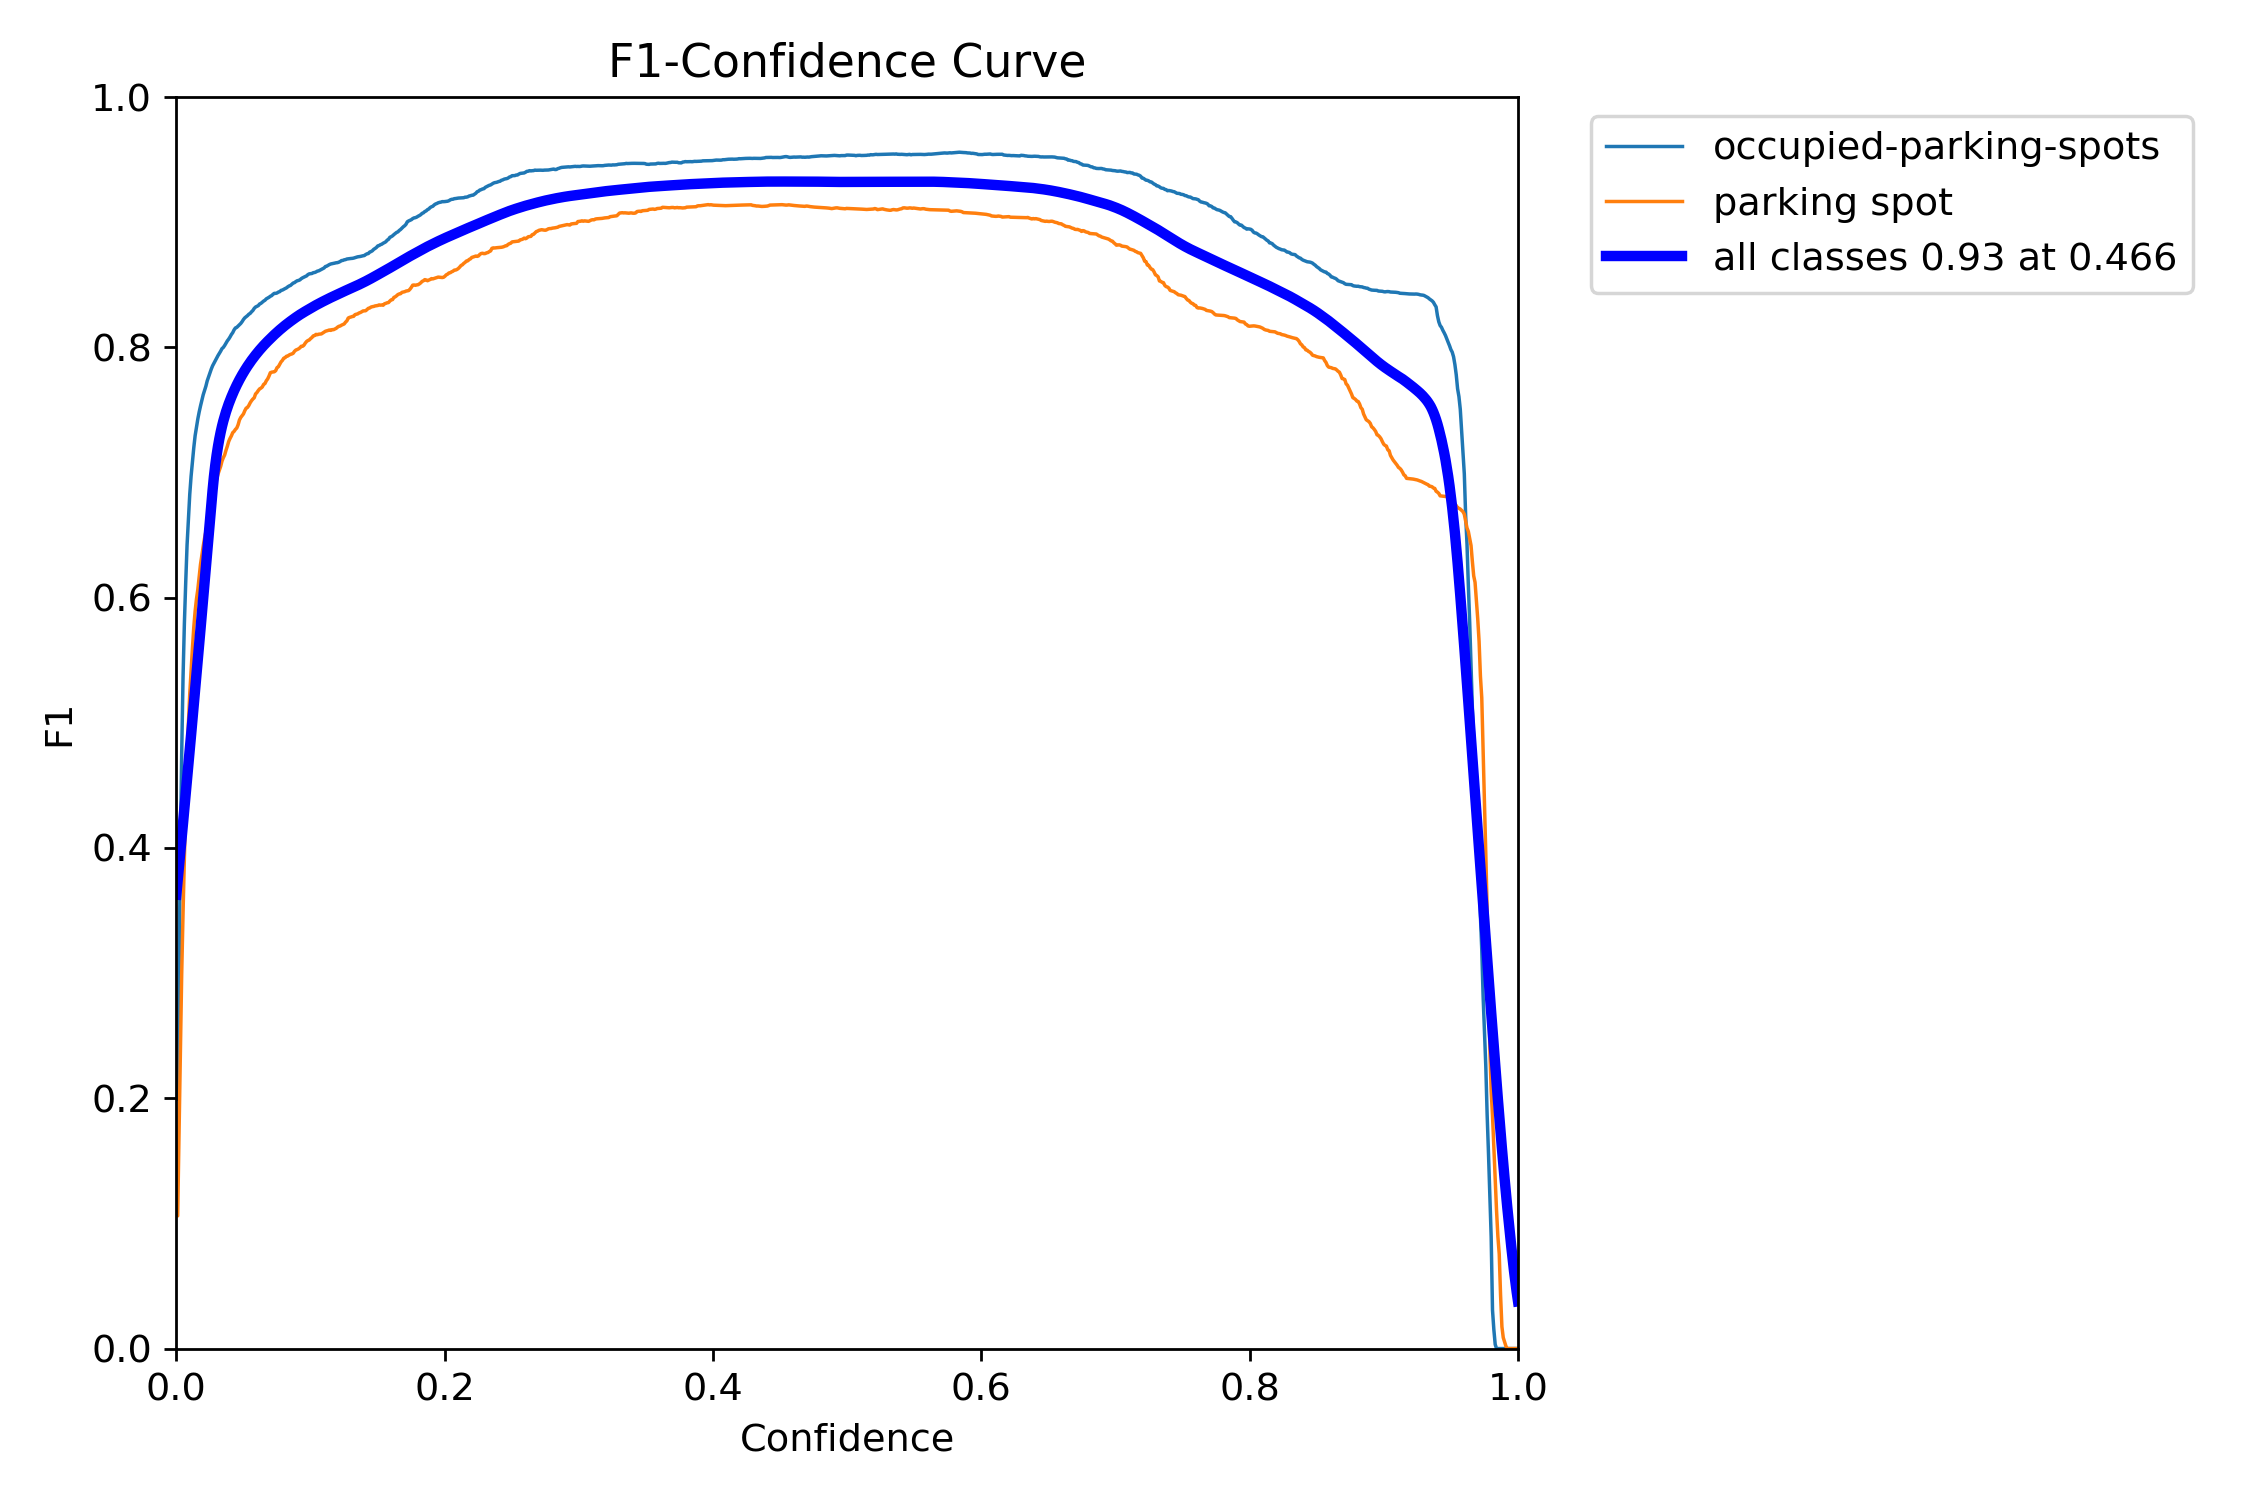

In [ ]:
Image("/content/runs/detect/train/F1_curve.png", width=600)

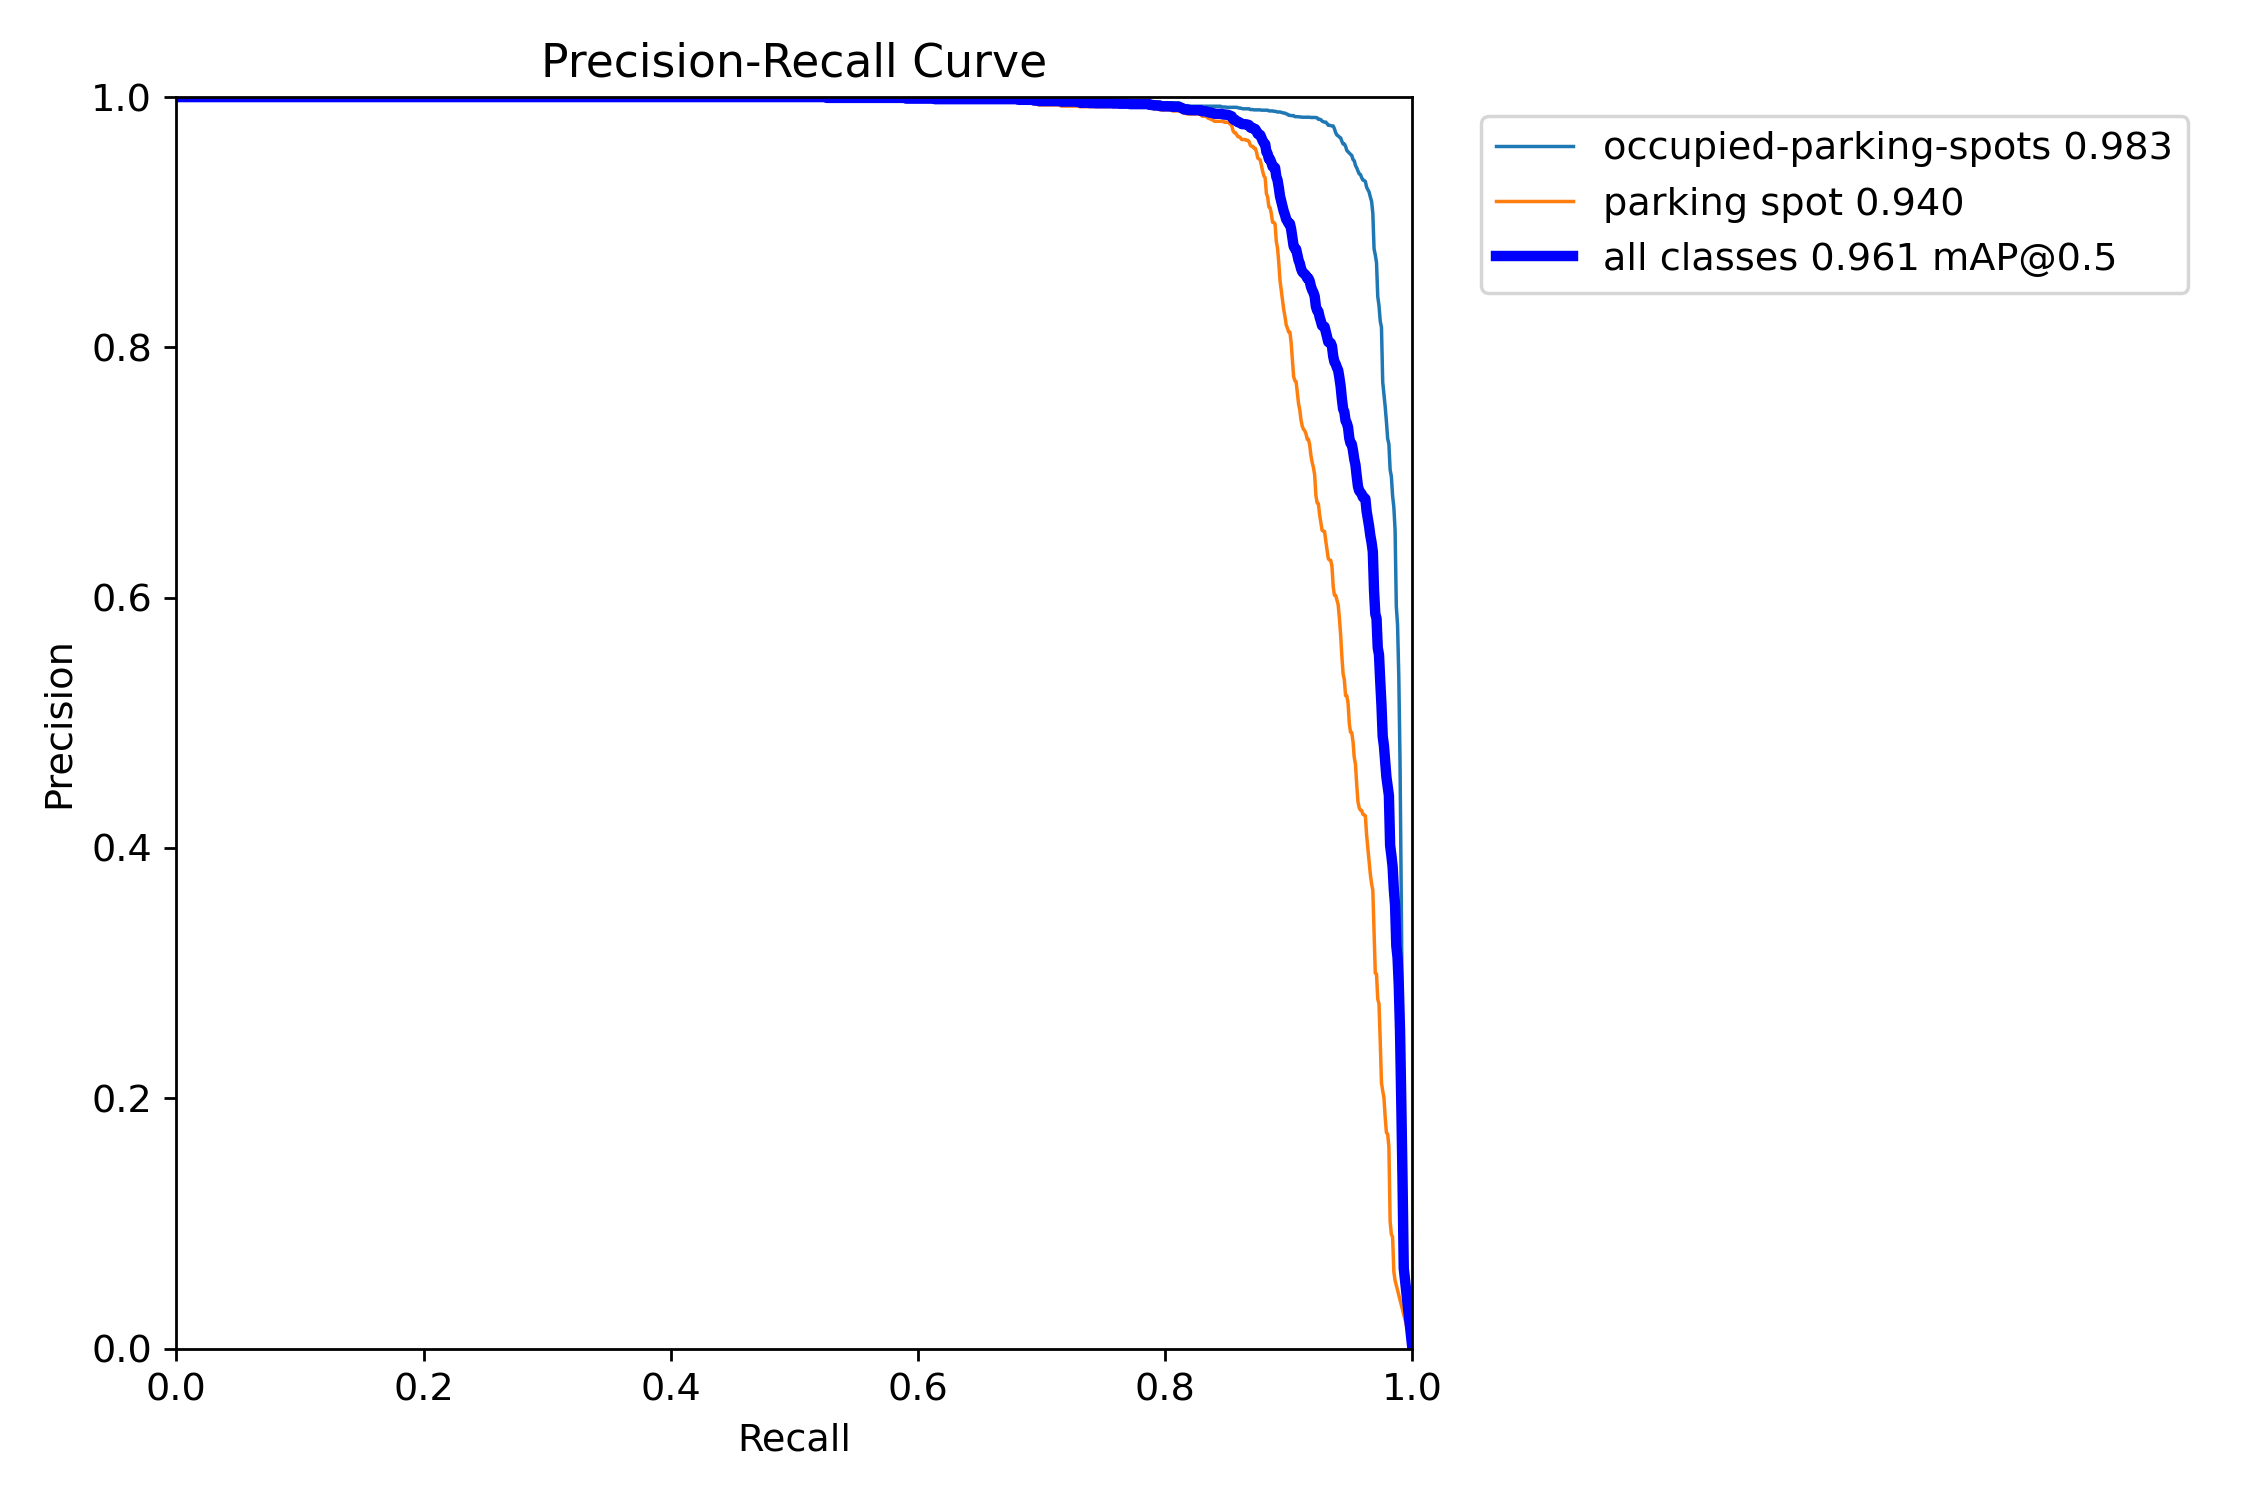

In [ ]:
Image("/content/runs/detect/train/PR_curve.png", width=600)

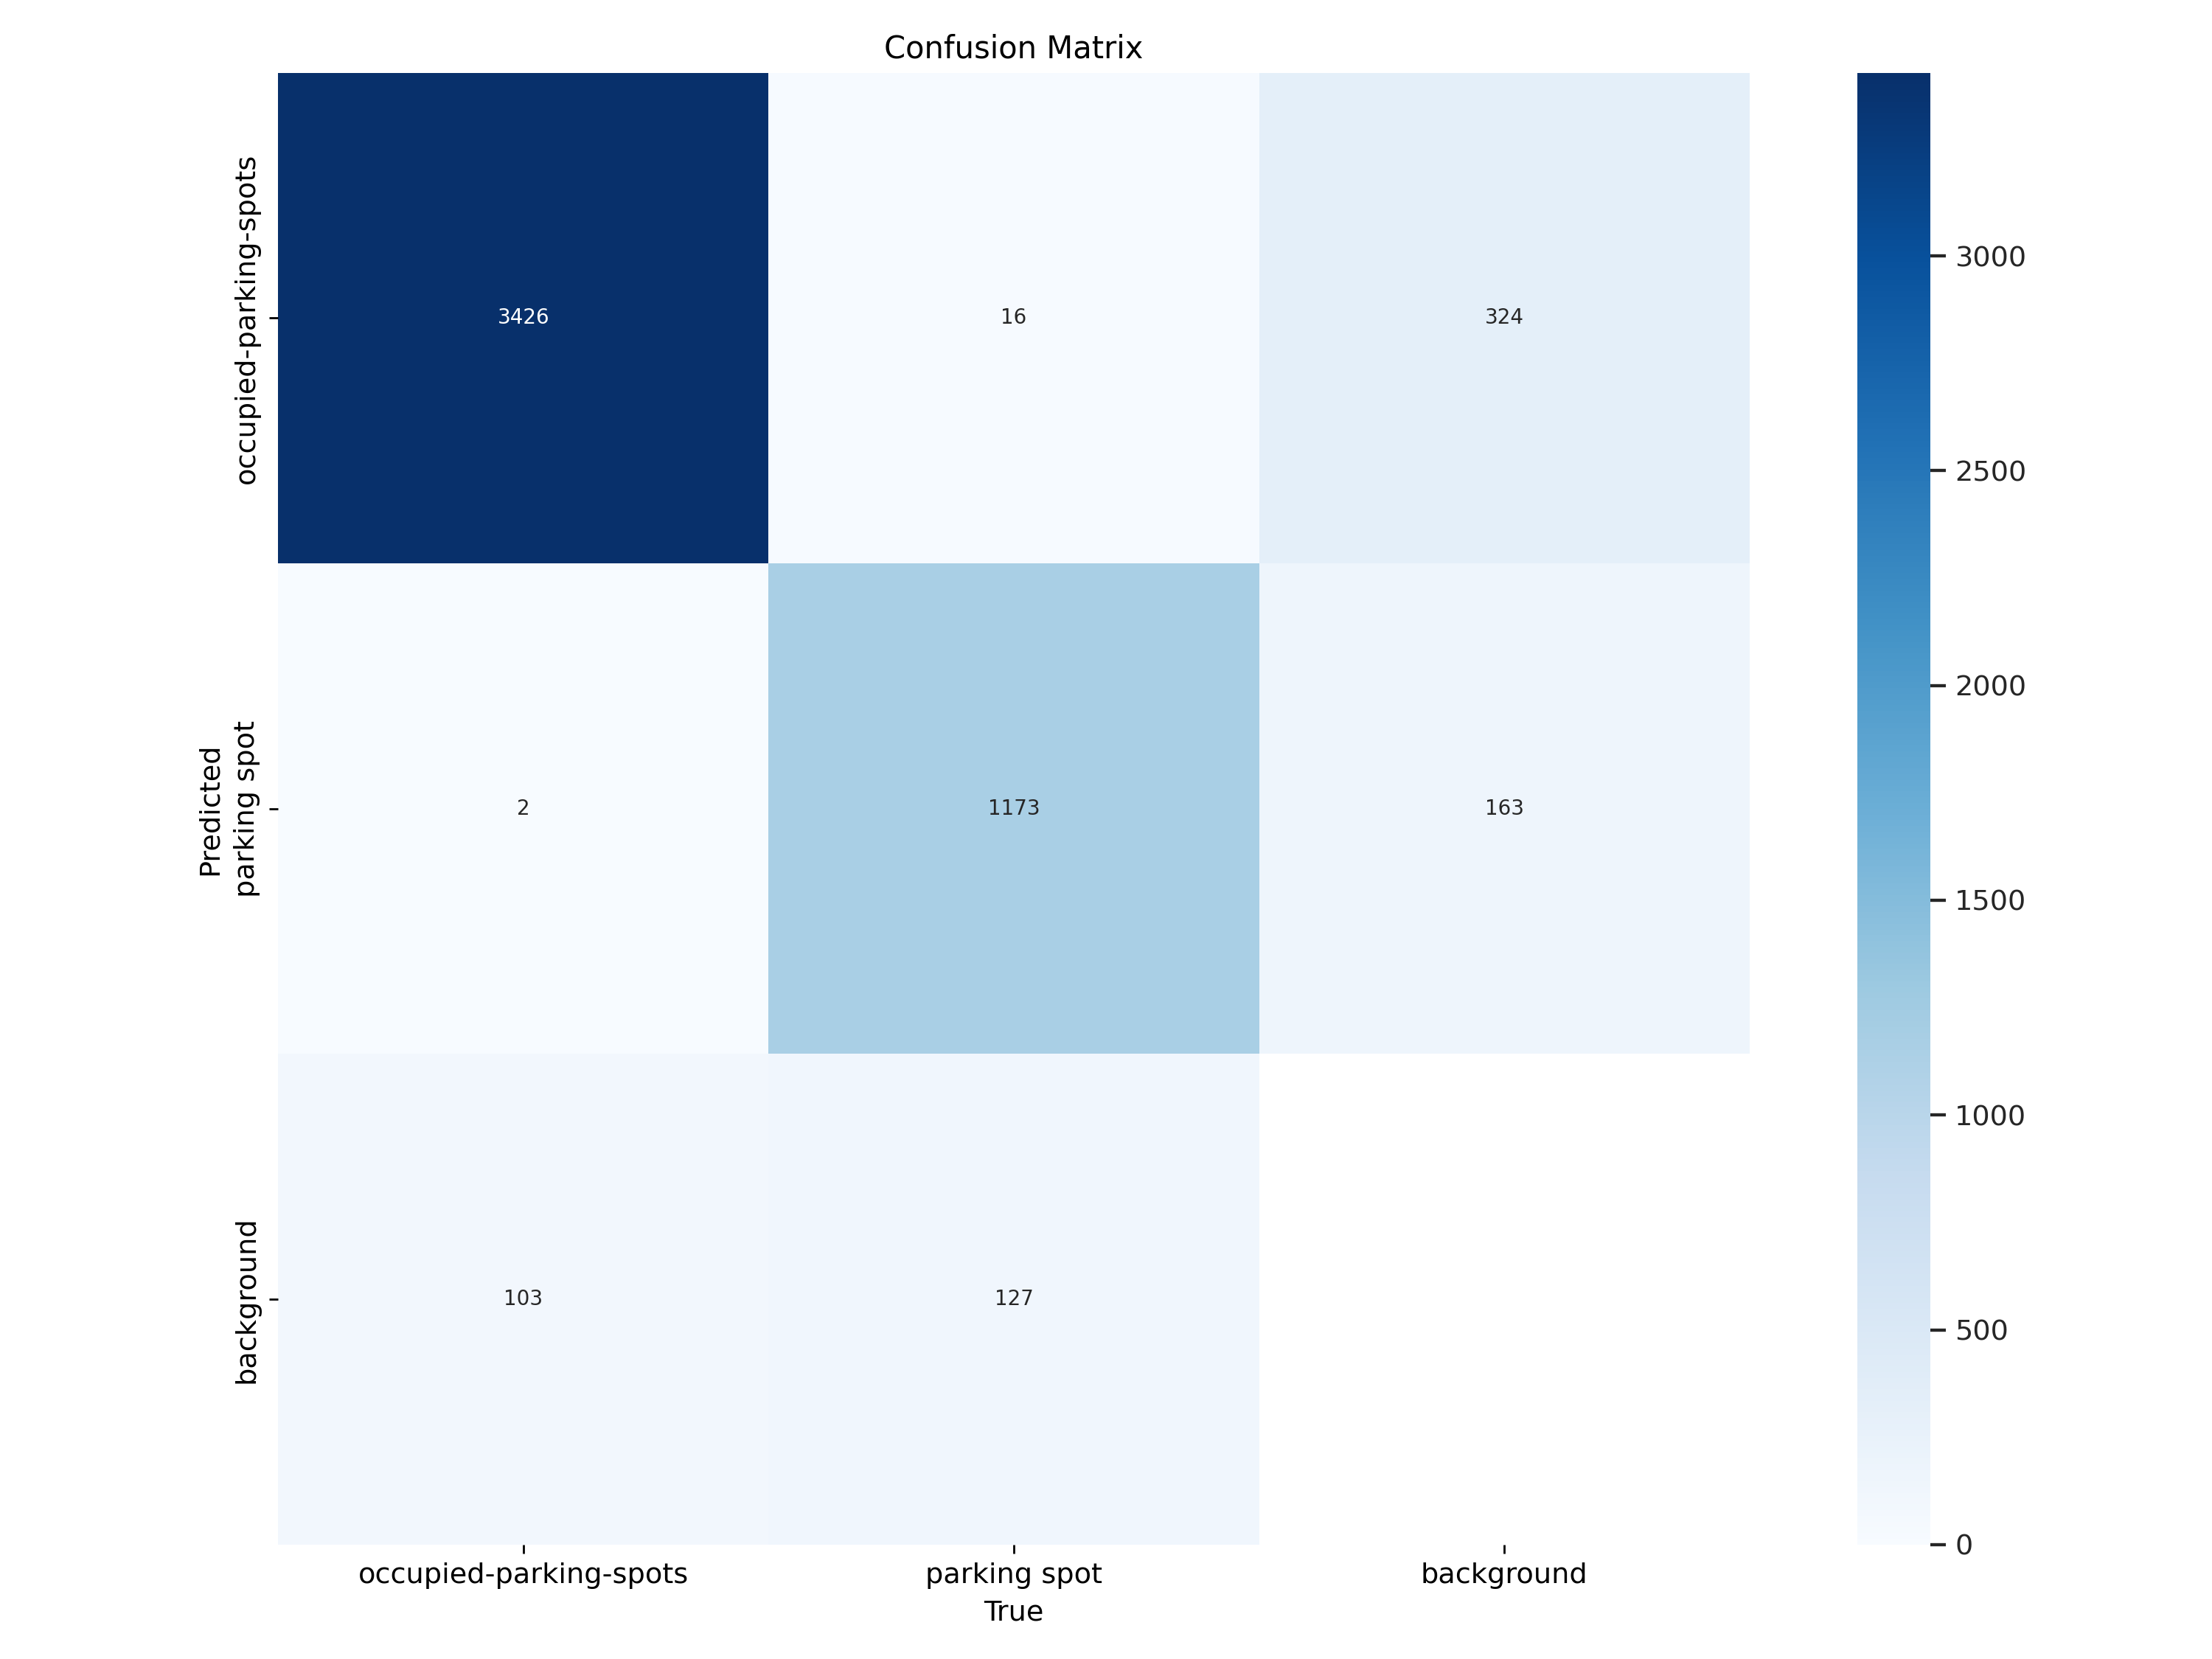

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

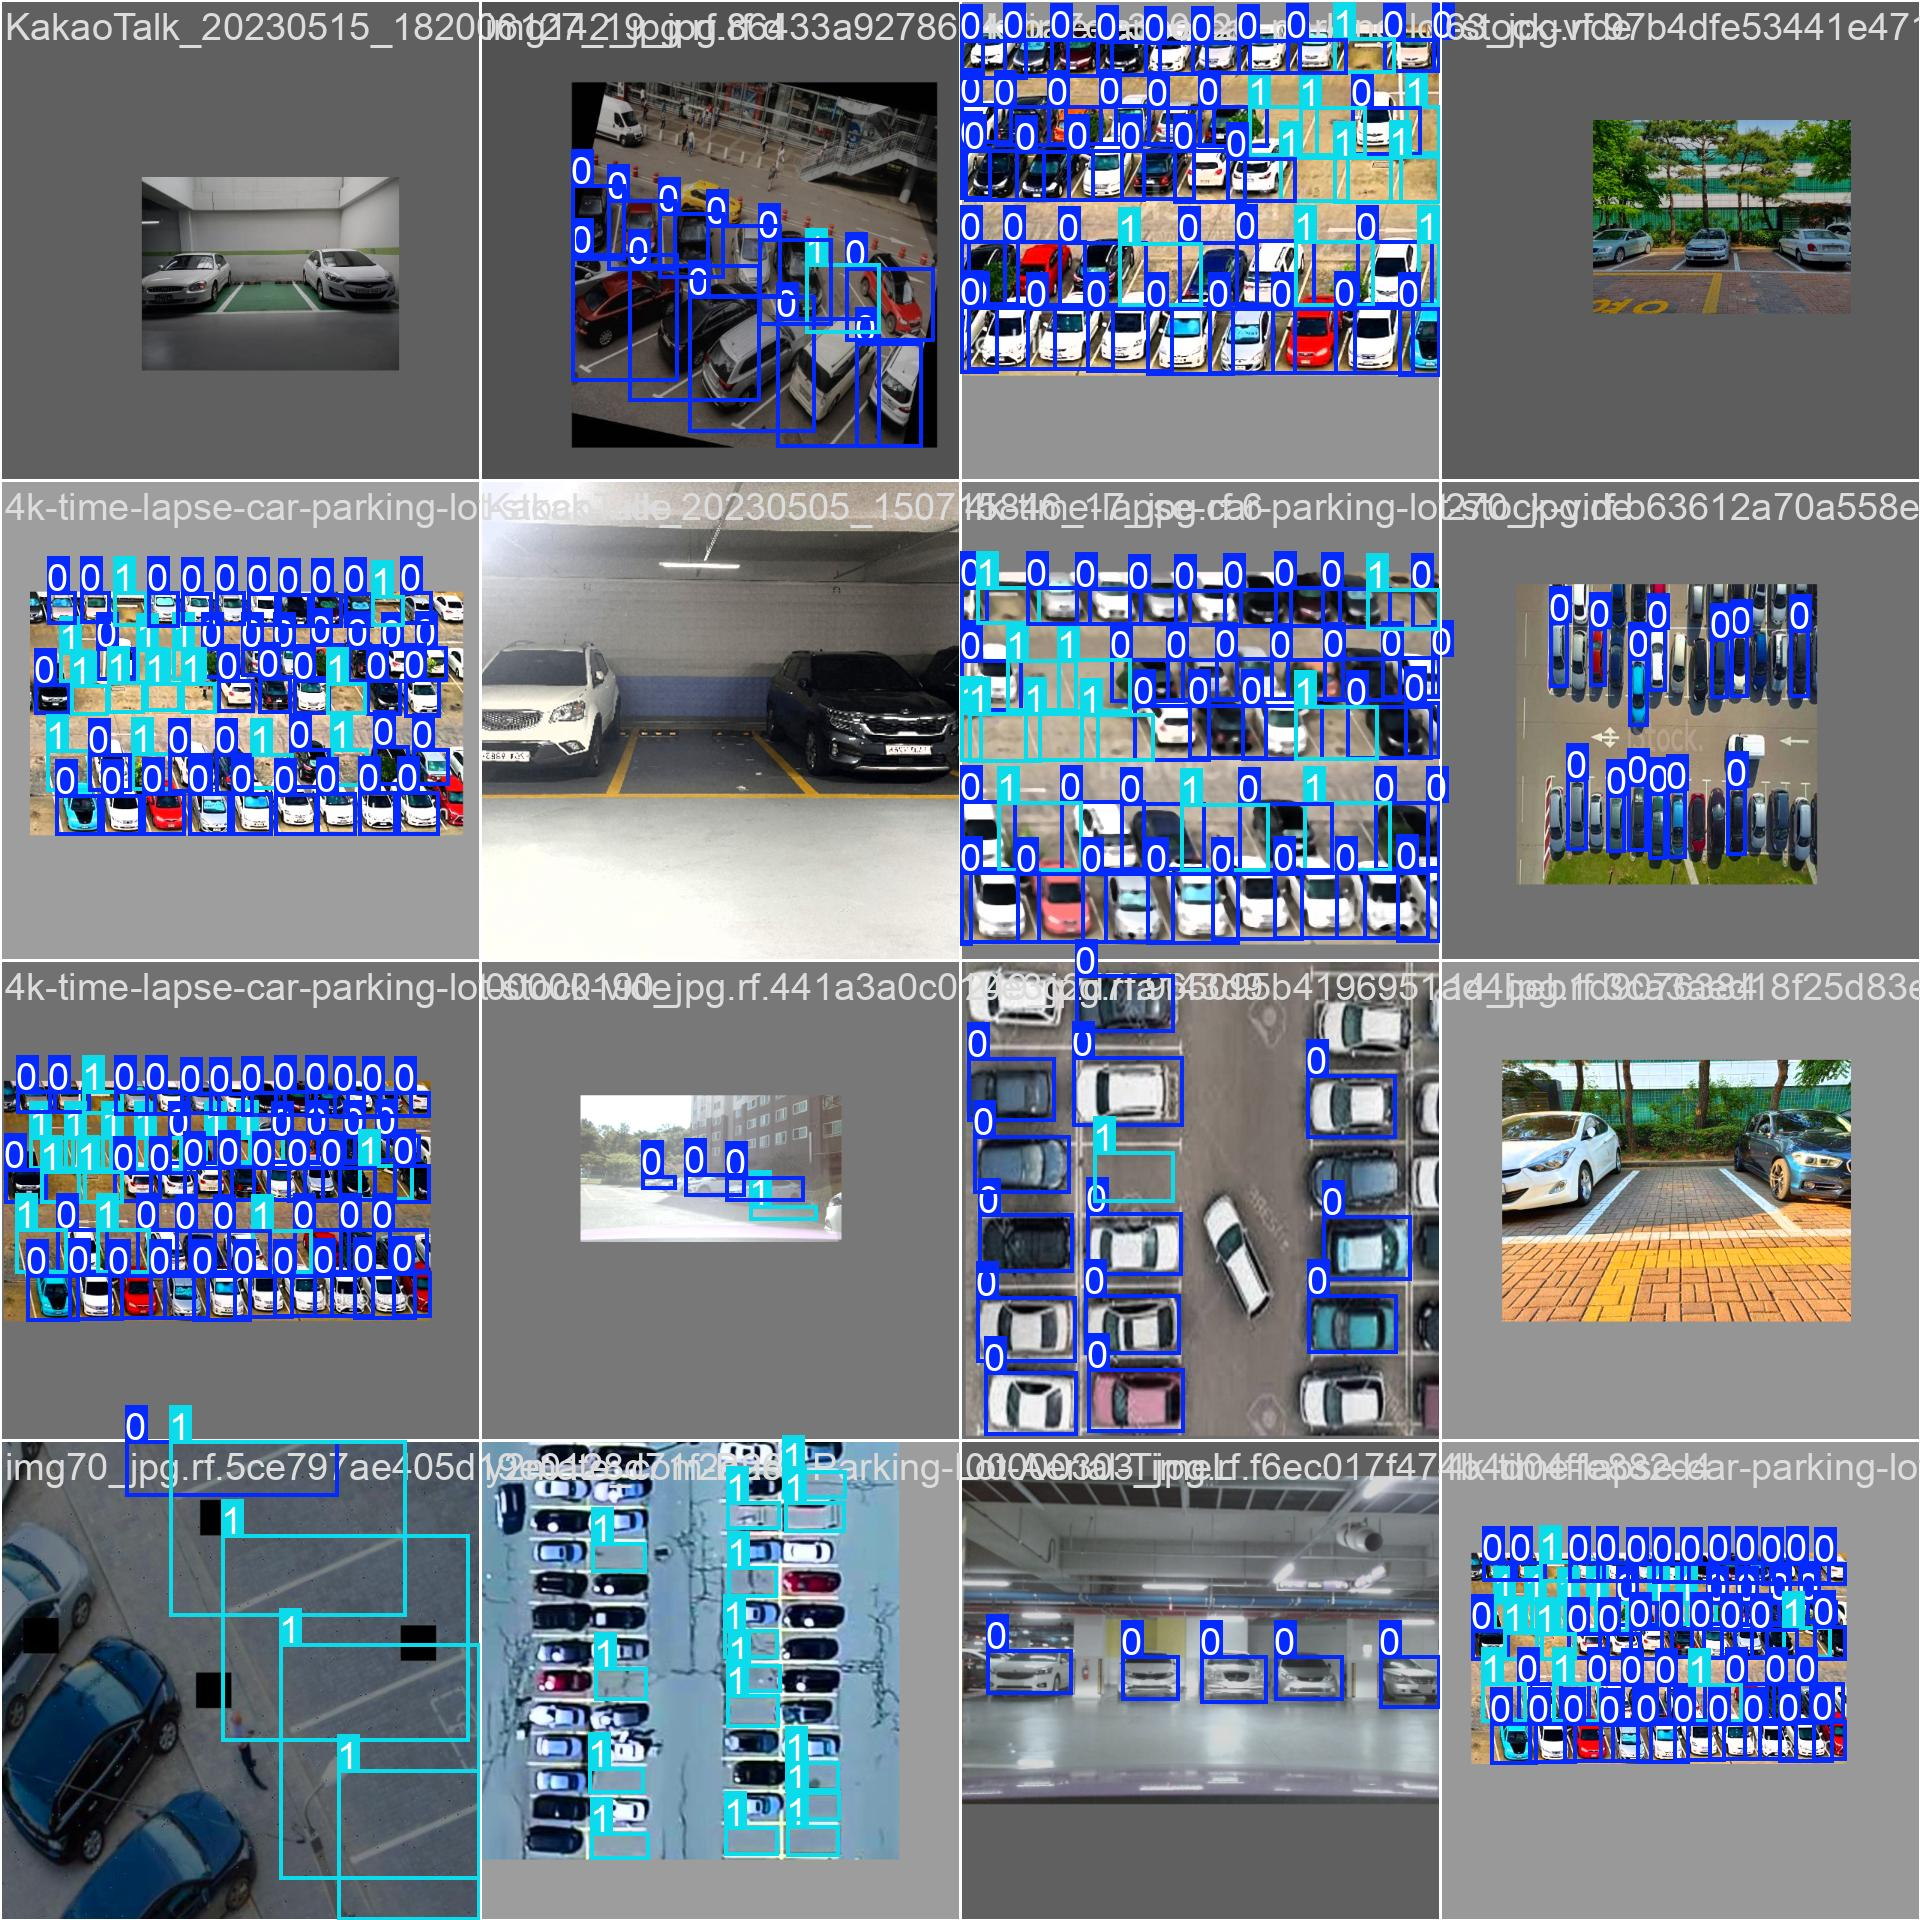

In [ ]:
Image("/content/runs/detect/train/train_batch1320.jpg", width=600)

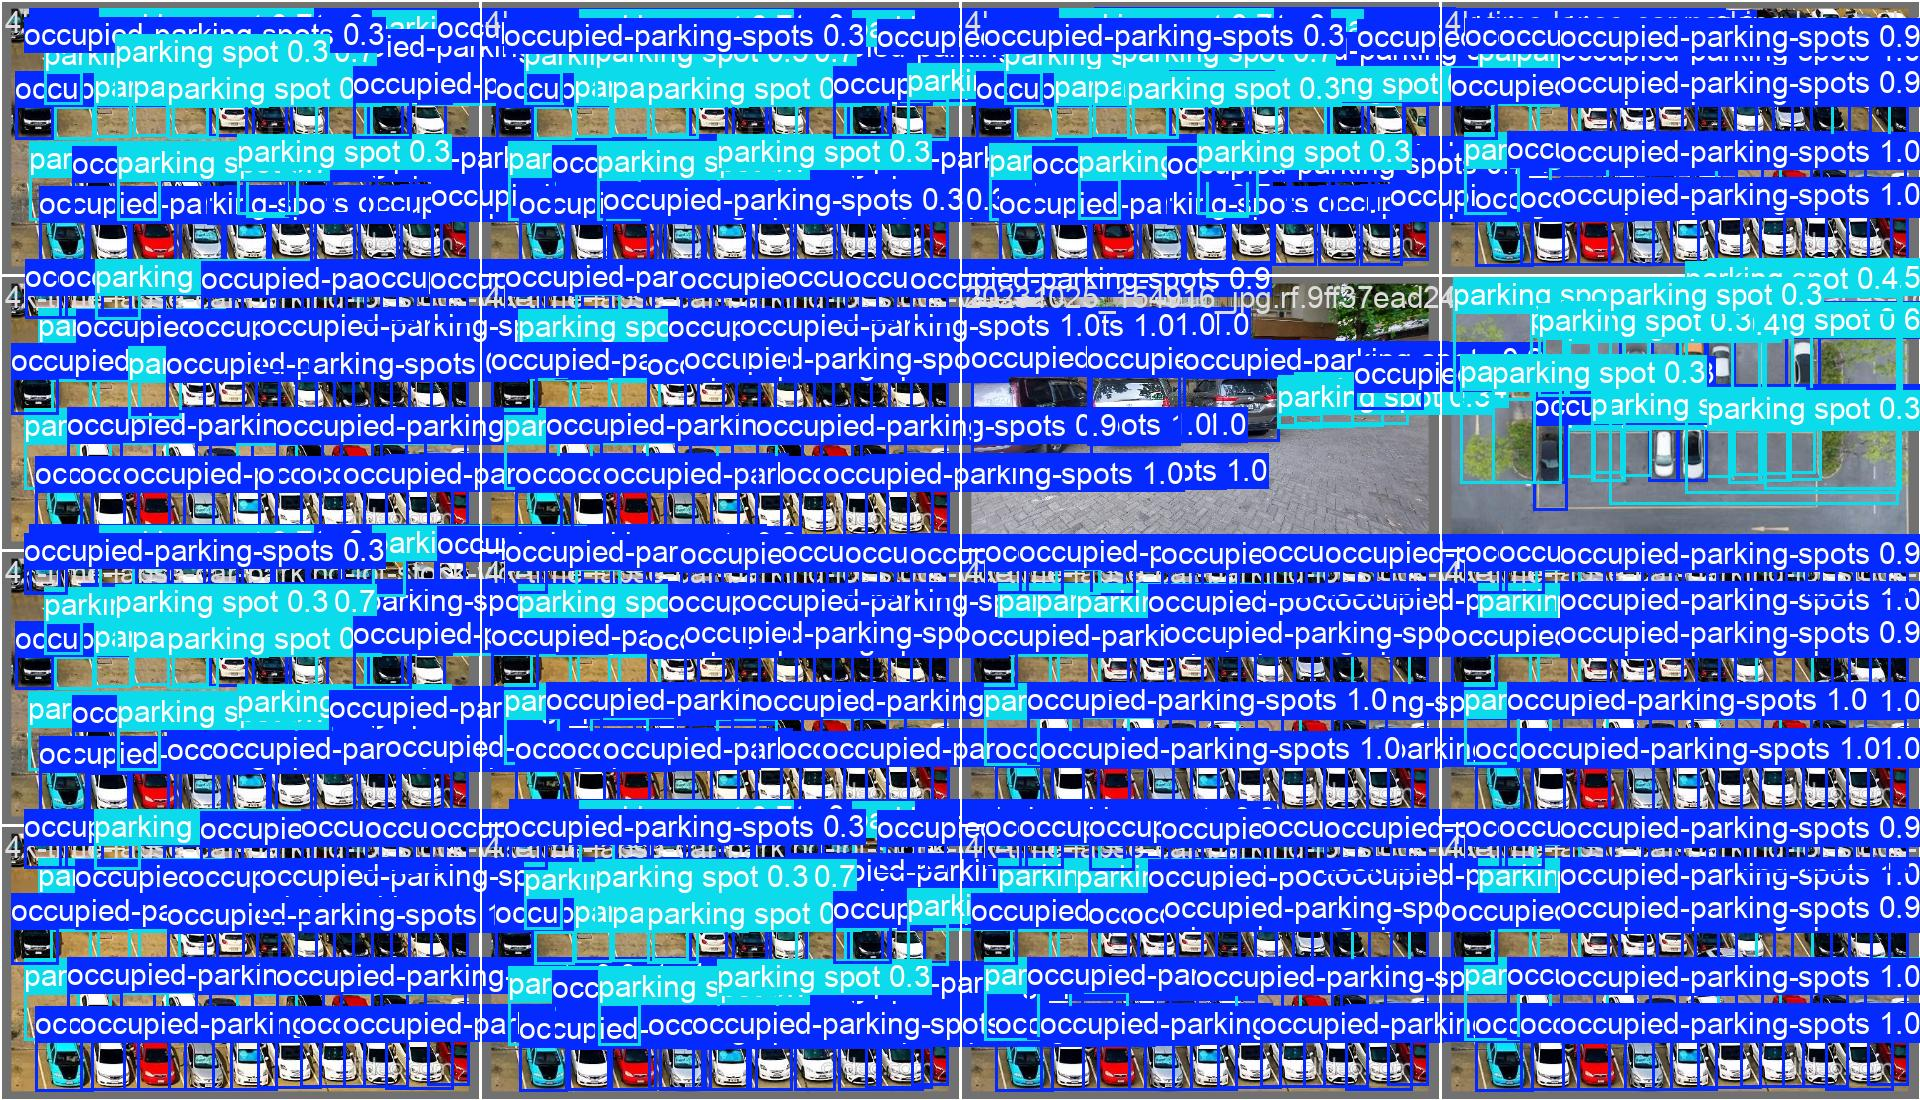

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

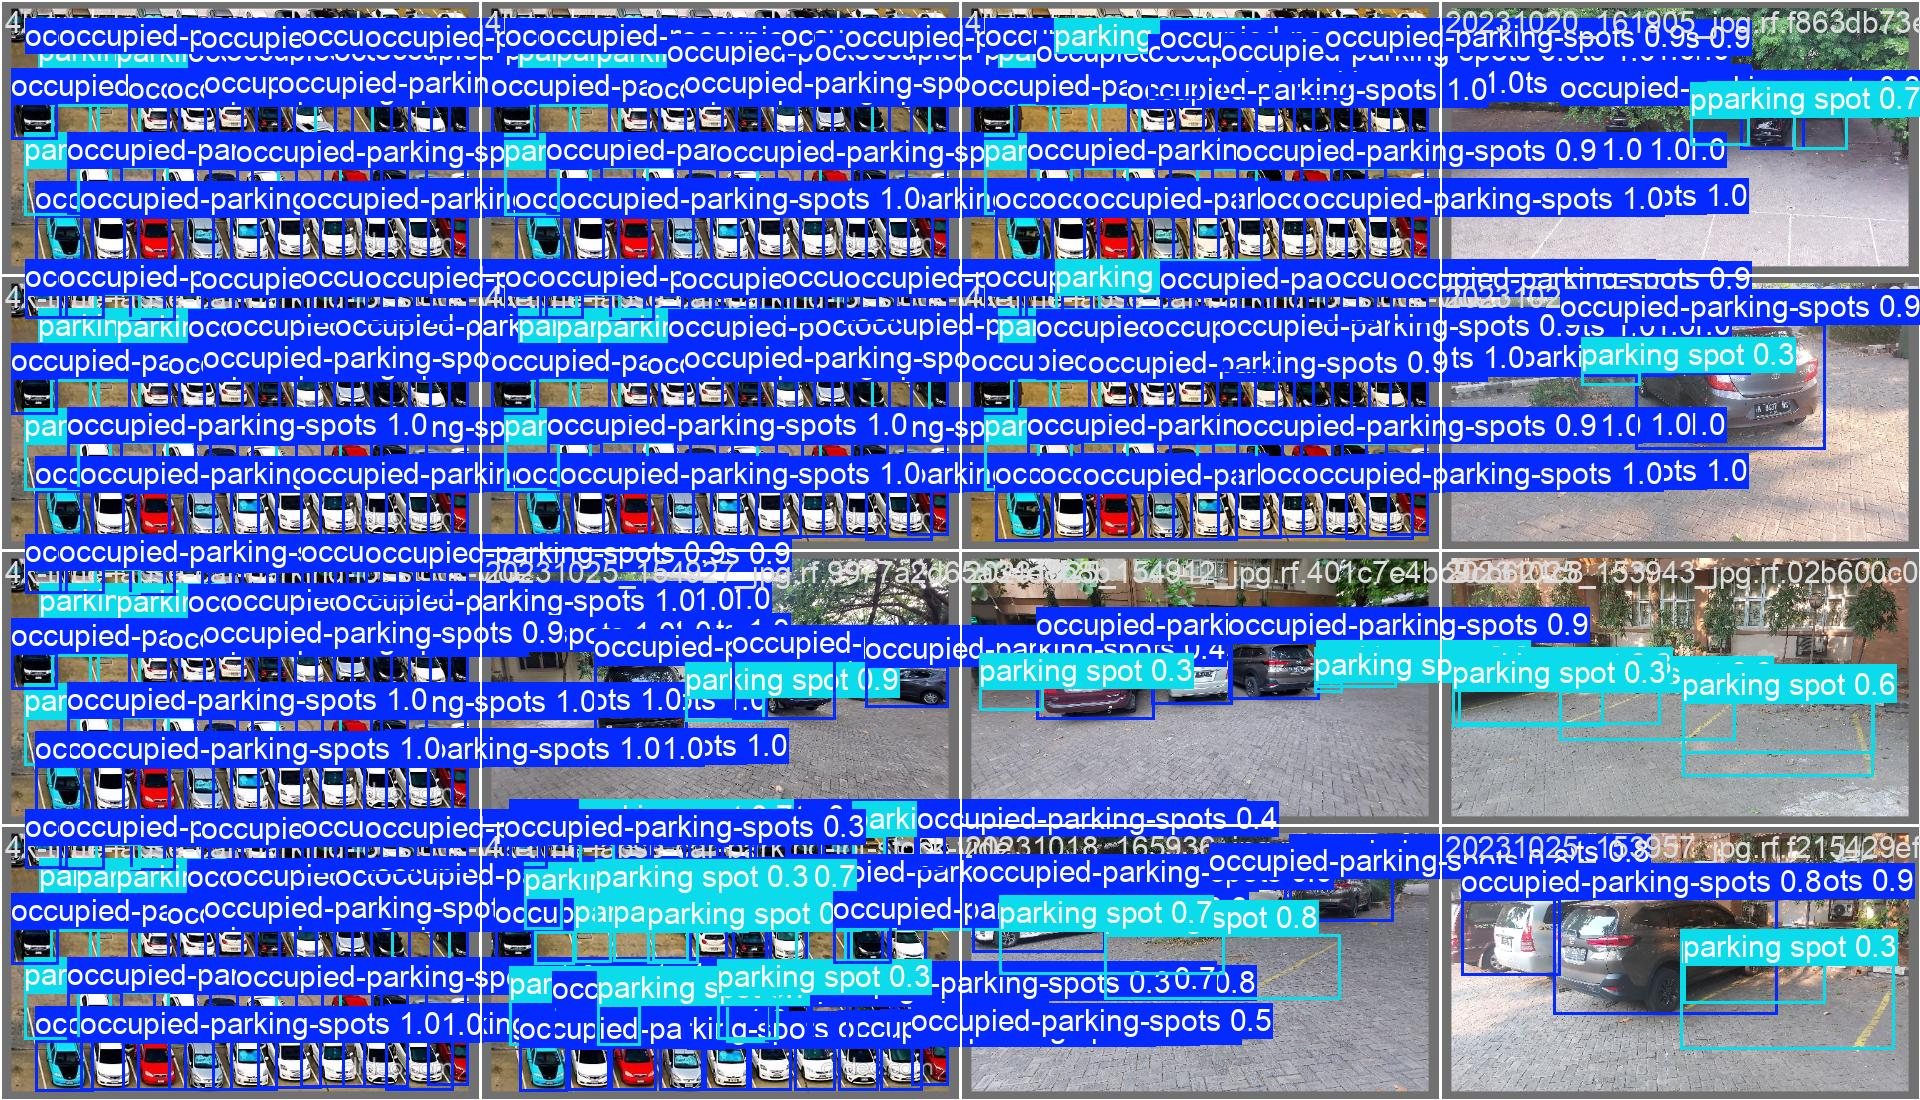

In [ ]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

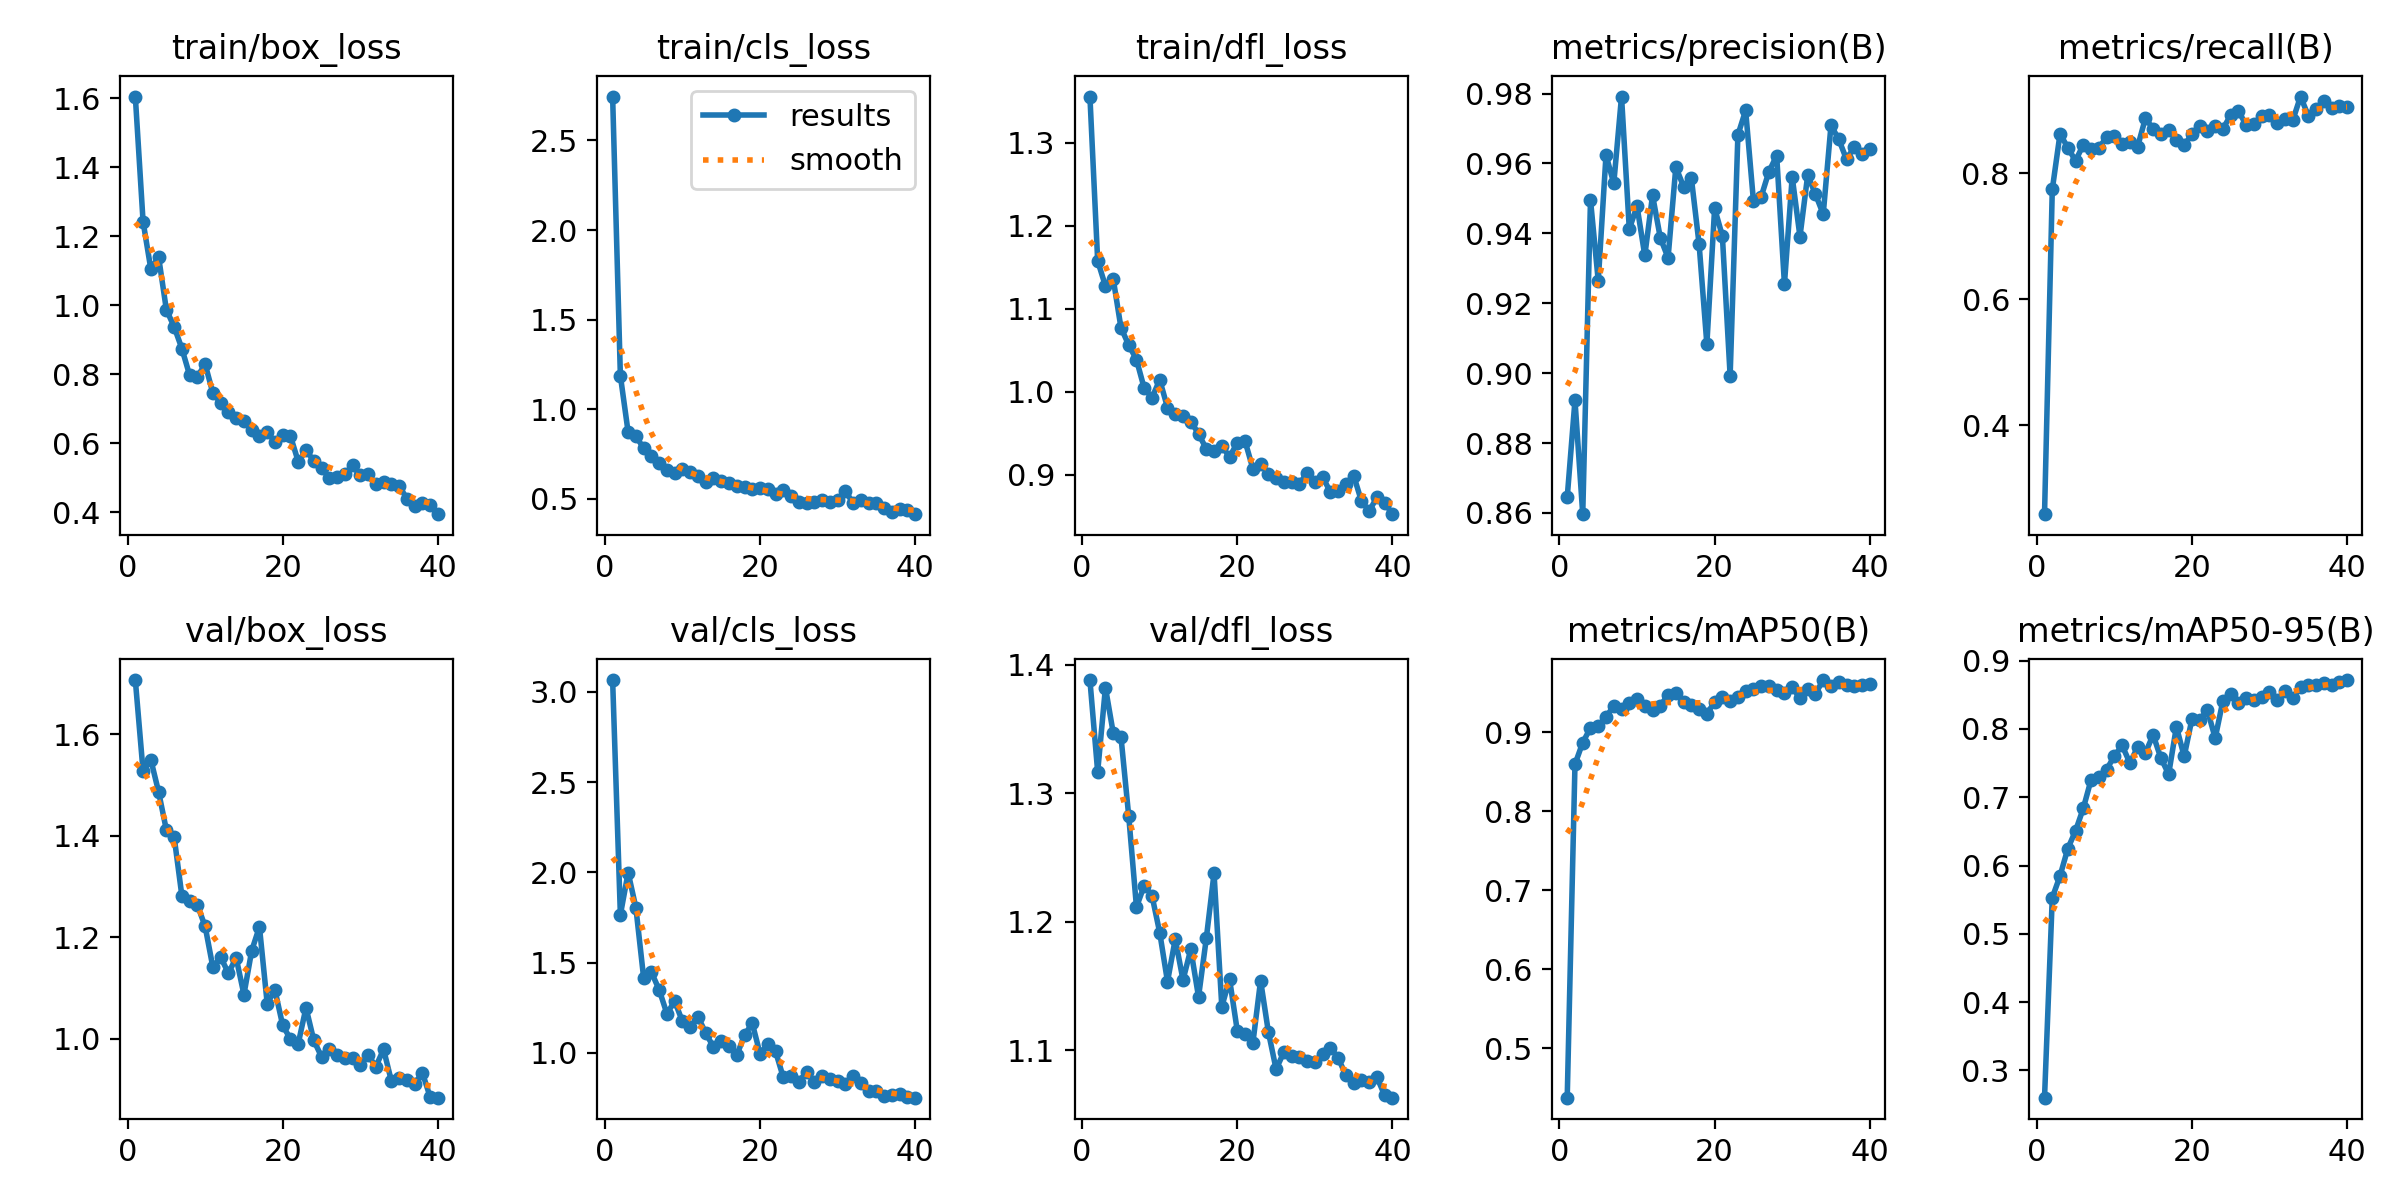

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

In [ ]:
# --> Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# --> Saving model to drive
!mv /content/runs/detect/train/weights/best1.pt /content/drive/MyDrive/SeniorDesignProject_AI

In [ ]:
# --> Downloading model weights from Google Drive
!gdown "https://drive.google.com/uc?id=1rNVdXDt75Euad25aOBC795xEI6peIAOh"

Downloading...
From: https://drive.google.com/uc?id=1rNVdXDt75Euad25aOBC795xEI6peIAOh
To: /content/best1.pt
100% 5.47M/5.47M [00:00<00:00, 33.1MB/s]


In [ ]:
# --> Validate fine-tuned model
!yolo task=detect mode=val model="best1.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/parking-space-finder-3/valid/labels.cache... 183 images, 23 backgrounds, 0 corrupt: 100% 183/183 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3530, len(boxes) = 4847. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:18<00:00,  1.55s/it]
                   all        183       4847      0.965      0.905      0.961      0.871
occupied-parking-spots        132       3531      0.961      0.946      0.982      0.923
          parking spot        148       1316      0.969      0.863       0.94       0.82
Speed: 2.3ms preprocess, 11.1ms

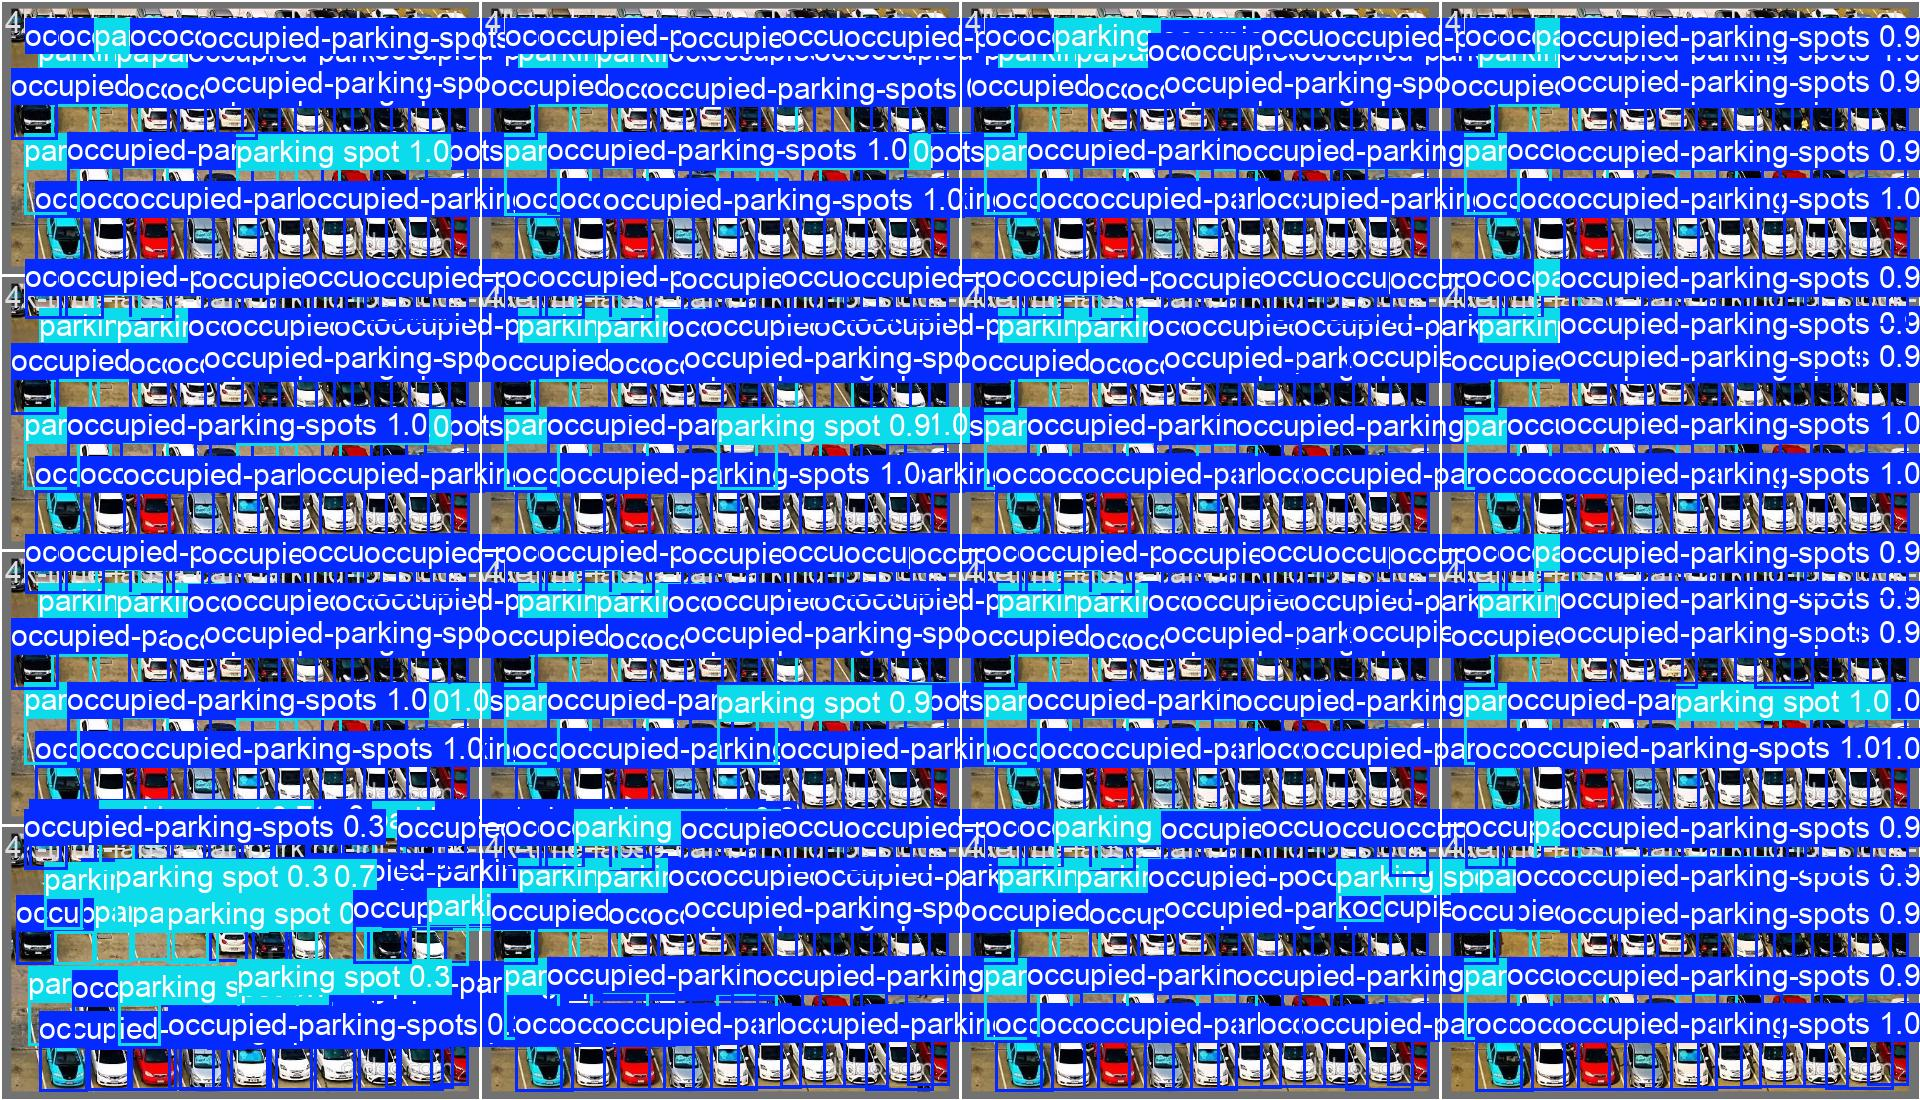

In [ ]:
Image("/content/runs/detect/val/val_batch1_pred.jpg", width=600
      )

In [ ]:
!yolo task=detect mode=predict model=best1.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/88 /content/parking-space-finder-3/test/images/20231025_153910_jpg.rf.6c1a0715604391e44bd8e48a533f2799.jpg: 384x640 2 occupied-parking-spotss, 2 parking spots, 44.9ms
image 2/88 /content/parking-space-finder-3/test/images/20231025_153917_jpg.rf.d0ad192b4260ce54c716d57ea28cc31a.jpg: 384x640 2 occupied-parking-spotss, 1 parking spot, 9.4ms
image 3/88 /content/parking-space-finder-3/test/images/20231025_154152_jpg.rf.49a933f9cbf48201fb81b5e2368ce52c.jpg: 384x640 1 occupied-parking-spots, 1 parking spot, 12.3ms
image 4/88 /content/parking-space-finder-3/test/images/20231025_154156_jpg.rf.a333841eed1018f99497cf8595a0859c.jpg: 384x640 2 occupied-parking-spotss, 1 parking spot, 9.2ms
image 5/88 /content/parking-space-finder-3/test/images/20231025_165249_jpg.rf.2feb3339ab0f16628221f8c62f17d012.jpg: 384x640 4 parking spots,

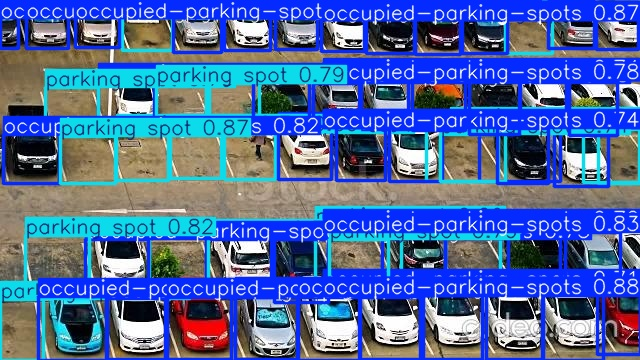

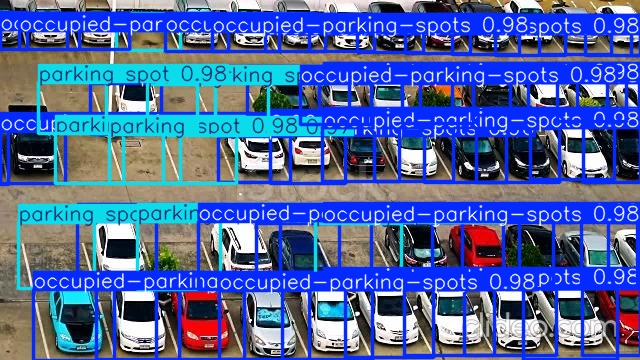

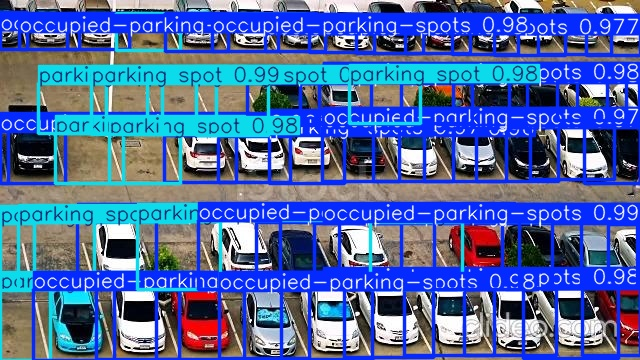

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display
latest_folder = max(glob.glob("/content/runs/detect/predict*/"), key=os.path.getmtime)

for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!gdown "https://drive.google.com/uc?id=1UzqqdRa0vpoW-AF0PYehkdzzRX4OE9Qm"

Downloading...
From: https://drive.google.com/uc?id=1UzqqdRa0vpoW-AF0PYehkdzzRX4OE9Qm
To: /content/Nile_carpark.jpg
100% 164k/164k [00:00<00:00, 4.14MB/s]


In [ ]:
!yolo task=detect mode=predict model=best1.pt conf=0.25 source="/content/Nile_carpark.jpg" save=True

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/Nile_carpark.jpg: 480x640 139 occupied-parking-spotss, 72.0ms
Speed: 3.7ms preprocess, 72.0ms inference, 809.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


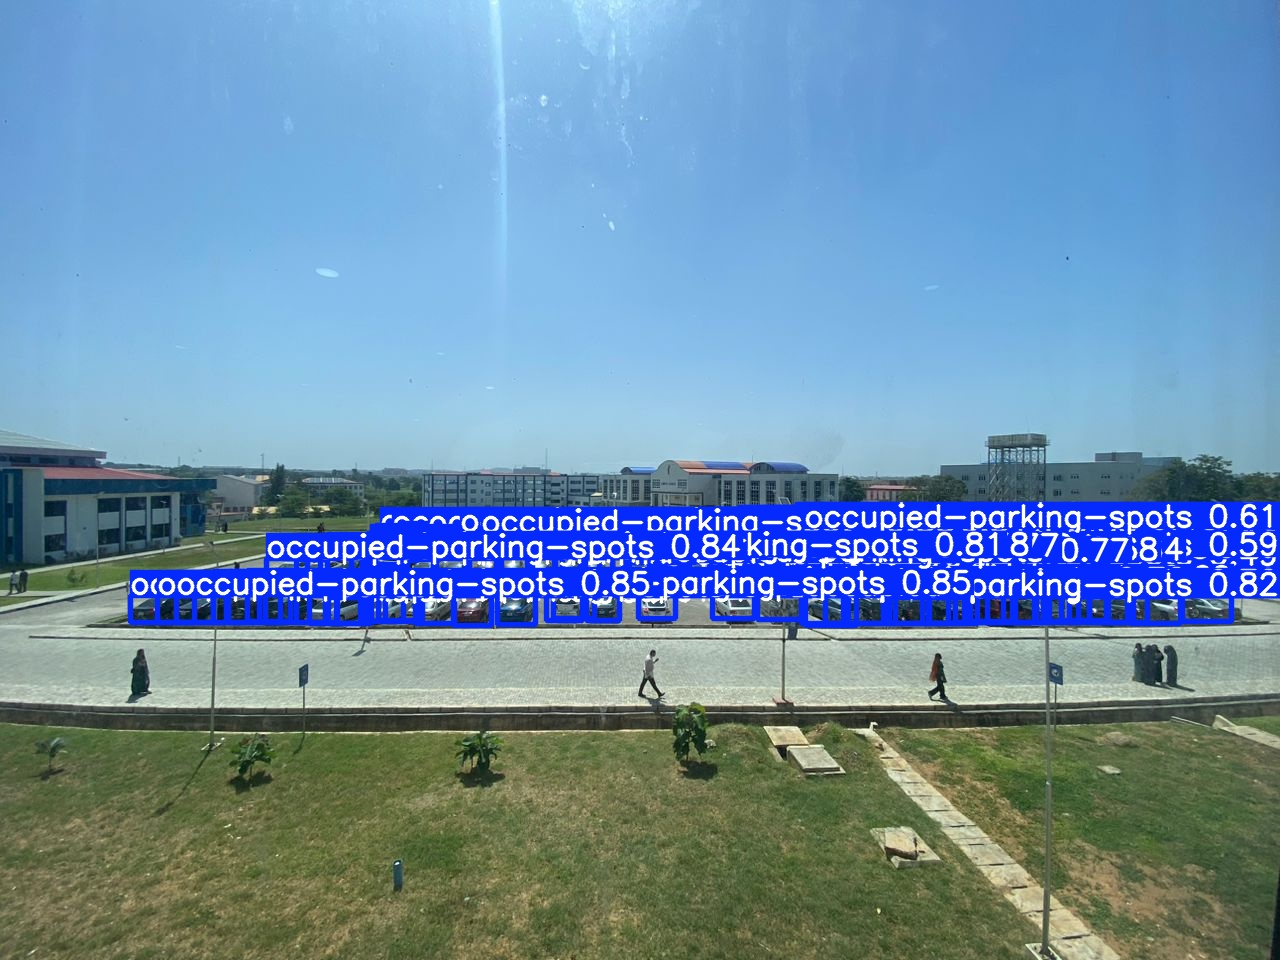

In [ ]:
Image("/content/runs/detect/predict2/Nile_carpark.jpg", width=600)


The model was saved and embedded into a web application for real-time usage on campus